In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[16,16,16,16,16,16] # sliding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=16
Axis='AccX' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/OptimChange/'+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/OptimChange/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/OptimChange/'+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/OptimChange/'+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/OptimChange/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/OptimChange/'+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/OptimChange_loss/'+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/OptimChange_loss/'+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/OptimChange_loss/'+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/OptimChange/'+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/OptimChange/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/OptimChange/'+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

In [7]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccX is registed now
Build Complete
(254742,)
windowData's num =15914
SourceData's aborting data = 6
window shape is (15914, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=16-SGD
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.4217 - val_loss: 0.1962
Epoch 2/50
0s - loss: 0.1169 - val_loss: 0.0723
Epoch 3/50
0s - loss: 0.0575 - val_loss: 0.0475
Epoch 4/50
0s - loss: 0.0420 - val_loss: 0.0376
Epoch 5/50
0s - loss: 0.0346 - val_loss: 0.0320
Epoch 6/50
0s - loss: 0.0302 - val_loss: 0.0285
Epoch 7/50
0s - loss: 0.0272 - val_loss: 0.0260
Epoch 8/50
0s - loss: 0.0250 - val_loss: 0.0241
Epoch 9/50
0s - loss: 0.0234 - val_loss: 0.0227
Epoch 10/50
0s - loss: 0.0221 - val_loss: 0.0215
Epoch 11/50
0s - loss: 0.0210 - val_loss: 0.0205
Epoch 12/50
0s - loss: 0.0201 - val_loss: 0.0197
Epoch 13/50
0s - loss: 0.0193 - val_loss: 0.0190
Epoch 14/50
0s - loss: 0.0187 - val_loss: 0.0184
Epoch 15/50
0s - loss: 0.0182 - val_loss: 0.0179
Epoch 16/50
0s - loss: 0.0177 - val_loss

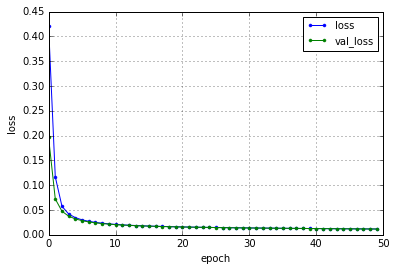

hiden node = 16
-edim=16-Window=128-Overlap=16-Adadelta
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.1367 - val_loss: 0.0164
Epoch 2/50
0s - loss: 0.0142 - val_loss: 0.0133
Epoch 3/50
0s - loss: 0.0099 - val_loss: 0.0081
Epoch 4/50
0s - loss: 0.0077 - val_loss: 0.0142
Epoch 5/50
0s - loss: 0.0066 - val_loss: 0.0053
Epoch 6/50
0s - loss: 0.0061 - val_loss: 0.0082
Epoch 7/50
0s - loss: 0.0055 - val_loss: 0.0055
Epoch 8/50
0s - loss: 0.0053 - val_loss: 0.0053
Epoch 9/50
0s - loss: 0.0051 - val_loss: 0.0044
Epoch 10/50
0s - loss: 0.0047 - val_loss: 0.0031
Epoch 11/50
0s - loss: 0.0048 - val_loss: 0.0057
Epoch 12/50
0s - loss: 0.0044 - val_loss: 0.0048
Epoch 13/50
0s - loss: 0.0042 - val_loss: 0.0035
Epoch 14/50
0s - loss: 0.0043 - val_loss: 0.0039
Epoch 15/50
0s - loss: 0.0042 - val_loss: 0.0026
Epoch 16/50
0s - loss: 0.0039 - val_loss: 0.0024
Epoch 17/50
0s - loss: 0.0041 - val_loss: 0.0036
Epoch 18/50
0s - loss: 0.0043 - val_loss: 0.0031
Epoch 19/50
0s - loss

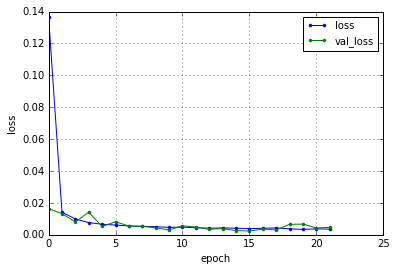

hiden node = 16
-edim=16-Window=128-Overlap=16-Adamax
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0527 - val_loss: 0.0145
Epoch 2/50
0s - loss: 0.0124 - val_loss: 0.0102
Epoch 3/50
0s - loss: 0.0083 - val_loss: 0.0094
Epoch 4/50
0s - loss: 0.0054 - val_loss: 0.0043
Epoch 5/50
0s - loss: 0.0040 - val_loss: 0.0042
Epoch 6/50
0s - loss: 0.0030 - val_loss: 0.0023
Epoch 7/50
0s - loss: 0.0023 - val_loss: 0.0021
Epoch 8/50
0s - loss: 0.0018 - val_loss: 0.0037
Epoch 9/50
0s - loss: 0.0015 - val_loss: 0.0011
Epoch 10/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 11/50
0s - loss: 0.0011 - val_loss: 8.1282e-04
Epoch 12/50
0s - loss: 9.2518e-04 - val_loss: 9.0157e-04
Epoch 13/50
0s - loss: 8.2451e-04 - val_loss: 7.3258e-04
Epoch 14/50
0s - loss: 7.4980e-04 - val_loss: 9.4673e-04
Epoch 15/50
0s - loss: 7.0525e-04 - val_loss: 5.2491e-04
Epoch 16/50
0s - loss: 6.4147e-04 - val_loss: 0.0016
Epoch 17/50
0s - loss: 6.4455e-04 - val_loss: 5.3409e-04
Epoch 18/50
0s - loss: 5

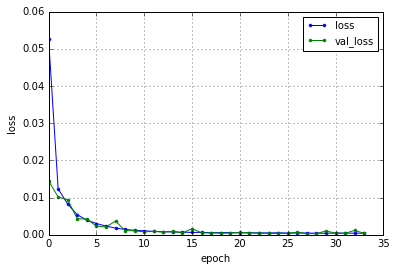

hiden node = 16
-edim=16-Window=128-Overlap=16-Adam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0631 - val_loss: 0.0129
Epoch 2/50
0s - loss: 0.0102 - val_loss: 0.0083
Epoch 3/50
0s - loss: 0.0064 - val_loss: 0.0068
Epoch 4/50
0s - loss: 0.0044 - val_loss: 0.0038
Epoch 5/50
0s - loss: 0.0034 - val_loss: 0.0028
Epoch 6/50
0s - loss: 0.0027 - val_loss: 0.0024
Epoch 7/50
0s - loss: 0.0022 - val_loss: 0.0025
Epoch 8/50
0s - loss: 0.0020 - val_loss: 0.0015
Epoch 9/50
0s - loss: 0.0017 - val_loss: 0.0015
Epoch 10/50
0s - loss: 0.0015 - val_loss: 0.0045
Epoch 11/50
0s - loss: 0.0014 - val_loss: 0.0011
Epoch 12/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 13/50
0s - loss: 0.0011 - val_loss: 7.8603e-04
Epoch 14/50
0s - loss: 8.9181e-04 - val_loss: 0.0010
Epoch 15/50
0s - loss: 8.9804e-04 - val_loss: 6.0077e-04
Epoch 16/50
0s - loss: 8.0370e-04 - val_loss: 8.3403e-04
Epoch 17/50
0s - loss: 7.8096e-04 - val_loss: 0.0013
Epoch 18/50
0s - loss: 7.0264e-04 - val_loss: 

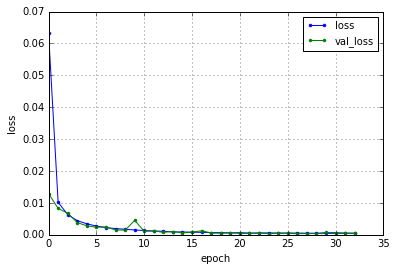

hiden node = 16
-edim=16-Window=128-Overlap=16-Adagrad
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0352 - val_loss: 0.0147
Epoch 2/50
0s - loss: 0.0130 - val_loss: 0.0111
Epoch 3/50
0s - loss: 0.0099 - val_loss: 0.0084
Epoch 4/50
0s - loss: 0.0079 - val_loss: 0.0071
Epoch 5/50
0s - loss: 0.0066 - val_loss: 0.0065
Epoch 6/50
0s - loss: 0.0059 - val_loss: 0.0053
Epoch 7/50
0s - loss: 0.0053 - val_loss: 0.0055
Epoch 8/50
0s - loss: 0.0049 - val_loss: 0.0045
Epoch 9/50
0s - loss: 0.0044 - val_loss: 0.0042
Epoch 10/50
0s - loss: 0.0042 - val_loss: 0.0048
Epoch 11/50
0s - loss: 0.0039 - val_loss: 0.0037
Epoch 12/50
0s - loss: 0.0037 - val_loss: 0.0037
Epoch 13/50
0s - loss: 0.0035 - val_loss: 0.0042
Epoch 14/50
0s - loss: 0.0033 - val_loss: 0.0070
Epoch 15/50
0s - loss: 0.0032 - val_loss: 0.0030
Epoch 16/50
0s - loss: 0.0031 - val_loss: 0.0031
Epoch 17/50
0s - loss: 0.0029 - val_loss: 0.0029
Epoch 18/50
0s - loss: 0.0028 - val_loss: 0.0026
Epoch 19/50
0s - loss:

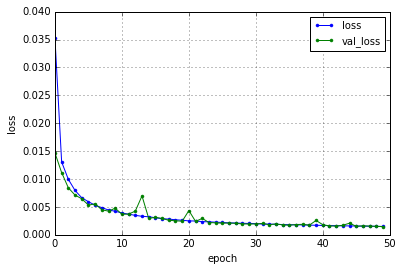

hiden node = 16
-edim=16-Window=128-Overlap=16-RMSprop
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0506 - val_loss: 0.0150
Epoch 2/50
0s - loss: 0.0106 - val_loss: 0.0062
Epoch 3/50
0s - loss: 0.0094 - val_loss: 0.0058
Epoch 4/50
0s - loss: 0.0085 - val_loss: 0.0049
Epoch 5/50
0s - loss: 0.0082 - val_loss: 0.0143
Epoch 6/50
0s - loss: 0.0078 - val_loss: 0.0072
Epoch 7/50
0s - loss: 0.0076 - val_loss: 0.0062
Epoch 8/50
0s - loss: 0.0074 - val_loss: 0.0045
Epoch 9/50
0s - loss: 0.0071 - val_loss: 0.0106
Epoch 10/50
0s - loss: 0.0070 - val_loss: 0.0040
Epoch 11/50
0s - loss: 0.0068 - val_loss: 0.0054
Epoch 12/50
0s - loss: 0.0067 - val_loss: 0.0037
Epoch 13/50
0s - loss: 0.0065 - val_loss: 0.0041
Epoch 14/50
0s - loss: 0.0064 - val_loss: 0.0038
Epoch 15/50
0s - loss: 0.0063 - val_loss: 0.0043
Epoch 16/50
0s - loss: 0.0061 - val_loss: 0.0051
Epoch 17/50
0s - loss: 0.0061 - val_loss: 0.0026
Epoch 18/50
0s - loss: 0.0059 - val_loss: 0.0047
Epoch 19/50
0s - loss:

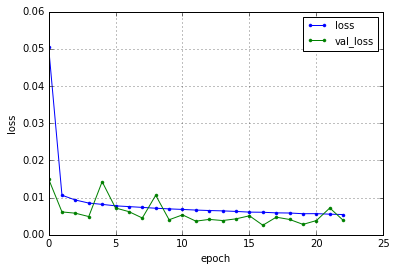

hiden node = 16
-edim=16-Window=128-Overlap=16-Nadam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0478 - val_loss: 0.0123
Epoch 2/50
0s - loss: 0.0123 - val_loss: 0.0078
Epoch 3/50
0s - loss: 0.0095 - val_loss: 0.0089
Epoch 4/50
0s - loss: 0.0082 - val_loss: 0.0048
Epoch 5/50
0s - loss: 0.0072 - val_loss: 0.0066
Epoch 6/50
0s - loss: 0.0064 - val_loss: 0.0064
Epoch 7/50
0s - loss: 0.0058 - val_loss: 0.0105
Epoch 8/50
0s - loss: 0.0053 - val_loss: 0.0209
Epoch 9/50
0s - loss: 0.0045 - val_loss: 0.0021
Epoch 10/50
0s - loss: 0.0043 - val_loss: 0.0023
Epoch 11/50
0s - loss: 0.0038 - val_loss: 0.0071
Epoch 12/50
0s - loss: 0.0033 - val_loss: 0.0062
Epoch 13/50
0s - loss: 0.0030 - val_loss: 0.0015
Epoch 14/50
0s - loss: 0.0030 - val_loss: 0.0014
Epoch 15/50
0s - loss: 0.0026 - val_loss: 0.0011
Epoch 16/50
0s - loss: 0.0025 - val_loss: 0.0039
Epoch 17/50
0s - loss: 0.0023 - val_loss: 0.0011
Epoch 18/50
0s - loss: 0.0021 - val_loss: 0.0010
Epoch 19/50
0s - loss: 0

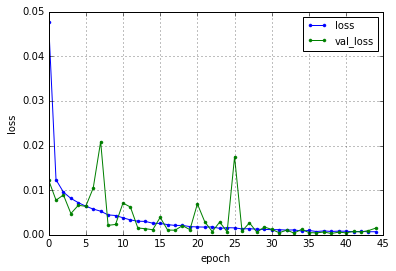

AccX is registed now
Build Complete
(254742,)
windowData's num =15906
SourceData's aborting data = 6
window shape is (15906, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=16-SGD
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.5310 - val_loss: 0.3507
Epoch 2/50
0s - loss: 0.2432 - val_loss: 0.1642
Epoch 3/50
0s - loss: 0.1246 - val_loss: 0.0960
Epoch 4/50
0s - loss: 0.0807 - val_loss: 0.0689
Epoch 5/50
0s - loss: 0.0614 - val_loss: 0.0553
Epoch 6/50
0s - loss: 0.0512 - val_loss: 0.0477
Epoch 7/50
0s - loss: 0.0451 - val_loss: 0.0429
Epoch 8/50
0s - loss: 0.0412 - val_loss: 0.0396
Epoch 9/50
0s - loss: 0.0383 - val_loss: 0.0371
Epoch 10/50
0s - loss: 0.0362 - val_loss: 0.0353
Epoch 11/50
0s - loss: 0.0345 - val_loss: 0.0337
Epoch 12/50
0s - loss: 0.0331 - val_loss: 0.0325
Epoch 13/50
0s - loss: 0.0319 - val_loss: 0.0315
Epoch 14/50
0s - loss: 0.0310 - val_loss: 0.0305
Epoch 15/50
0s - loss: 0.0302 - val_loss: 0.0298
Epoch 16/50
0s - loss: 0.0294 - val_loss

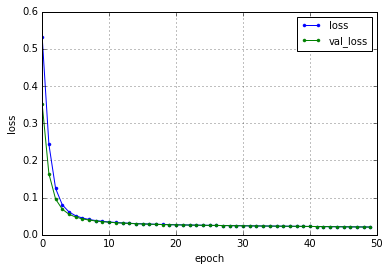

hiden node = 16
-edim=16-Window=256-Overlap=16-Adadelta
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.1015 - val_loss: 0.0256
Epoch 2/50
0s - loss: 0.0240 - val_loss: 0.0310
Epoch 3/50
0s - loss: 0.0159 - val_loss: 0.0126
Epoch 4/50
0s - loss: 0.0136 - val_loss: 0.0135
Epoch 5/50
0s - loss: 0.0119 - val_loss: 0.0104
Epoch 6/50
0s - loss: 0.0106 - val_loss: 0.0111
Epoch 7/50
0s - loss: 0.0101 - val_loss: 0.0080
Epoch 8/50
0s - loss: 0.0091 - val_loss: 0.0113
Epoch 9/50
0s - loss: 0.0090 - val_loss: 0.0330
Epoch 10/50
0s - loss: 0.0087 - val_loss: 0.0096
Epoch 11/50
0s - loss: 0.0086 - val_loss: 0.0112
Epoch 12/50
0s - loss: 0.0081 - val_loss: 0.0056
Epoch 13/50
0s - loss: 0.0077 - val_loss: 0.0195
Epoch 14/50
0s - loss: 0.0079 - val_loss: 0.0104
Epoch 15/50
0s - loss: 0.0076 - val_loss: 0.0095
Epoch 16/50
0s - loss: 0.0075 - val_loss: 0.0050
Epoch 17/50
0s - loss: 0.0072 - val_loss: 0.0097
Epoch 18/50
0s - loss: 0.0070 - val_loss: 0.0216
Epoch 19/50
0s - loss

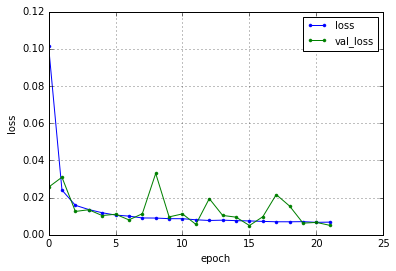

hiden node = 16
-edim=16-Window=256-Overlap=16-Adamax
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0597 - val_loss: 0.0214
Epoch 2/50
0s - loss: 0.0164 - val_loss: 0.0130
Epoch 3/50
0s - loss: 0.0106 - val_loss: 0.0096
Epoch 4/50
0s - loss: 0.0072 - val_loss: 0.0060
Epoch 5/50
0s - loss: 0.0053 - val_loss: 0.0048
Epoch 6/50
0s - loss: 0.0042 - val_loss: 0.0033
Epoch 7/50
0s - loss: 0.0031 - val_loss: 0.0029
Epoch 8/50
0s - loss: 0.0027 - val_loss: 0.0022
Epoch 9/50
0s - loss: 0.0022 - val_loss: 0.0020
Epoch 10/50
0s - loss: 0.0020 - val_loss: 0.0043
Epoch 11/50
0s - loss: 0.0018 - val_loss: 0.0016
Epoch 12/50
0s - loss: 0.0017 - val_loss: 0.0015
Epoch 13/50
0s - loss: 0.0016 - val_loss: 0.0025
Epoch 14/50
0s - loss: 0.0015 - val_loss: 0.0012
Epoch 15/50
0s - loss: 0.0015 - val_loss: 0.0052
Epoch 16/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 17/50
0s - loss: 0.0013 - val_loss: 0.0010
Epoch 18/50
0s - loss: 0.0012 - val_loss: 9.3800e-04
Epoch 19/50
0s - lo

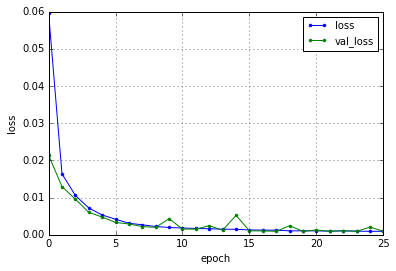

hiden node = 16
-edim=16-Window=256-Overlap=16-Adam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0667 - val_loss: 0.0191
Epoch 2/50
0s - loss: 0.0137 - val_loss: 0.0095
Epoch 3/50
0s - loss: 0.0085 - val_loss: 0.0075
Epoch 4/50
0s - loss: 0.0062 - val_loss: 0.0101
Epoch 5/50
0s - loss: 0.0050 - val_loss: 0.0054
Epoch 6/50
0s - loss: 0.0042 - val_loss: 0.0050
Epoch 7/50
0s - loss: 0.0036 - val_loss: 0.0028
Epoch 8/50
0s - loss: 0.0031 - val_loss: 0.0029
Epoch 9/50
0s - loss: 0.0028 - val_loss: 0.0022
Epoch 10/50
0s - loss: 0.0024 - val_loss: 0.0022
Epoch 11/50
0s - loss: 0.0022 - val_loss: 0.0018
Epoch 12/50
0s - loss: 0.0019 - val_loss: 0.0017
Epoch 13/50
0s - loss: 0.0018 - val_loss: 0.0023
Epoch 14/50
0s - loss: 0.0017 - val_loss: 0.0018
Epoch 15/50
0s - loss: 0.0015 - val_loss: 0.0012
Epoch 16/50
0s - loss: 0.0015 - val_loss: 0.0012
Epoch 17/50
0s - loss: 0.0015 - val_loss: 0.0012
Epoch 18/50
0s - loss: 0.0014 - val_loss: 0.0013
Epoch 19/50
0s - loss: 0.

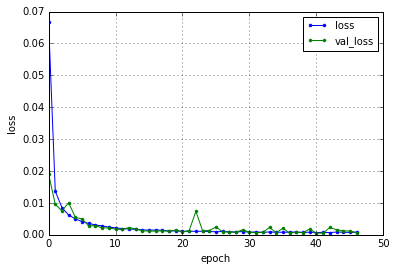

hiden node = 16
-edim=16-Window=256-Overlap=16-Adagrad
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0413 - val_loss: 0.0249
Epoch 2/50
0s - loss: 0.0189 - val_loss: 0.0159
Epoch 3/50
0s - loss: 0.0135 - val_loss: 0.0423
Epoch 4/50
0s - loss: 0.0109 - val_loss: 0.0095
Epoch 5/50
0s - loss: 0.0094 - val_loss: 0.0082
Epoch 6/50
0s - loss: 0.0082 - val_loss: 0.0450
Epoch 7/50
0s - loss: 0.0077 - val_loss: 0.0069
Epoch 8/50
0s - loss: 0.0070 - val_loss: 0.0066
Epoch 9/50
0s - loss: 0.0069 - val_loss: 0.0073
Epoch 10/50
0s - loss: 0.0063 - val_loss: 0.0105
Epoch 11/50
0s - loss: 0.0060 - val_loss: 0.0058
Epoch 12/50
0s - loss: 0.0059 - val_loss: 0.0053
Epoch 13/50
0s - loss: 0.0054 - val_loss: 0.0054
Epoch 14/50
0s - loss: 0.0053 - val_loss: 0.0100
Epoch 15/50
0s - loss: 0.0051 - val_loss: 0.0080
Epoch 16/50
0s - loss: 0.0049 - val_loss: 0.0123
Epoch 17/50
0s - loss: 0.0047 - val_loss: 0.0046
Epoch 18/50
0s - loss: 0.0046 - val_loss: 0.0043
Epoch 19/50
0s - loss:

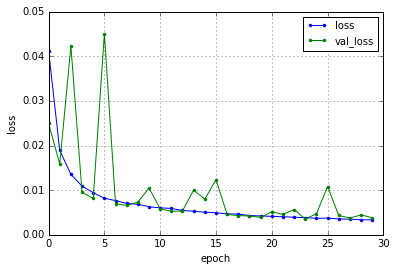

hiden node = 16
-edim=16-Window=256-Overlap=16-RMSprop
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0601 - val_loss: 0.0185
Epoch 2/50
0s - loss: 0.0173 - val_loss: 0.0178
Epoch 3/50
0s - loss: 0.0150 - val_loss: 0.0125
Epoch 4/50
0s - loss: 0.0144 - val_loss: 0.0088
Epoch 5/50
0s - loss: 0.0137 - val_loss: 0.0086
Epoch 6/50
0s - loss: 0.0131 - val_loss: 0.0099
Epoch 7/50
0s - loss: 0.0127 - val_loss: 0.0133
Epoch 8/50
0s - loss: 0.0123 - val_loss: 0.0194
Epoch 9/50
0s - loss: 0.0119 - val_loss: 0.0109
Epoch 10/50
0s - loss: 0.0115 - val_loss: 0.0248
Epoch 11/50
0s - loss: 0.0113 - val_loss: 0.0123


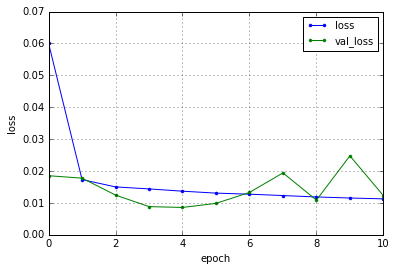

hiden node = 16
-edim=16-Window=256-Overlap=16-Nadam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0544 - val_loss: 0.0178
Epoch 2/50
0s - loss: 0.0190 - val_loss: 0.0183
Epoch 3/50
0s - loss: 0.0153 - val_loss: 0.0093
Epoch 4/50
0s - loss: 0.0131 - val_loss: 0.0363
Epoch 5/50
0s - loss: 0.0112 - val_loss: 0.0223
Epoch 6/50
0s - loss: 0.0101 - val_loss: 0.0360
Epoch 7/50
0s - loss: 0.0093 - val_loss: 0.0293
Epoch 8/50
0s - loss: 0.0082 - val_loss: 0.0170
Epoch 9/50
0s - loss: 0.0075 - val_loss: 0.0126


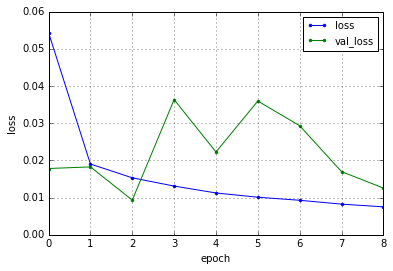

AccX is registed now
Build Complete
(254742,)
windowData's num =15890
SourceData's aborting data = 6
window shape is (15890, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=16-SGD
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.6546 - val_loss: 0.5312
Epoch 2/50
0s - loss: 0.4258 - val_loss: 0.3361
Epoch 3/50
0s - loss: 0.2745 - val_loss: 0.2234
Epoch 4/50
0s - loss: 0.1886 - val_loss: 0.1594
Epoch 5/50
0s - loss: 0.1389 - val_loss: 0.1215
Epoch 6/50
0s - loss: 0.1088 - val_loss: 0.0978
Epoch 7/50
0s - loss: 0.0896 - val_loss: 0.0825
Epoch 8/50
0s - loss: 0.0770 - val_loss: 0.0722
Epoch 9/50
0s - loss: 0.0685 - val_loss: 0.0651
Epoch 10/50
0s - loss: 0.0624 - val_loss: 0.0600
Epoch 11/50
0s - loss: 0.0580 - val_loss: 0.0561
Epoch 12/50
0s - loss: 0.0546 - val_loss: 0.0532
Epoch 13/50
0s - loss: 0.0520 - val_loss: 0.0509
Epoch 14/50
0s - loss: 0.0499 - val_loss: 0.0490
Epoch 15/50
0s - loss: 0.0482 - val_loss: 0.0475
Epoch 16/50
0s - loss: 0.0468 - val_loss

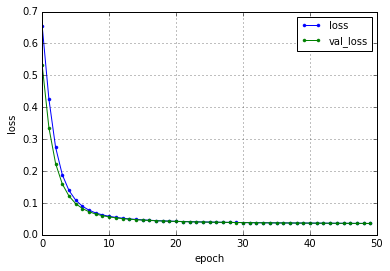

hiden node = 16
-edim=16-Window=512-Overlap=16-Adadelta
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.1145 - val_loss: 0.0552
Epoch 2/50
0s - loss: 0.0361 - val_loss: 0.0336
Epoch 3/50
0s - loss: 0.0292 - val_loss: 0.0244
Epoch 4/50
0s - loss: 0.0235 - val_loss: 0.0192
Epoch 5/50
0s - loss: 0.0203 - val_loss: 0.0189
Epoch 6/50
0s - loss: 0.0184 - val_loss: 0.0280
Epoch 7/50
0s - loss: 0.0173 - val_loss: 0.0143
Epoch 8/50
0s - loss: 0.0164 - val_loss: 0.0184
Epoch 9/50
0s - loss: 0.0156 - val_loss: 0.0168
Epoch 10/50
0s - loss: 0.0147 - val_loss: 0.0249
Epoch 11/50
0s - loss: 0.0136 - val_loss: 0.0168
Epoch 12/50
0s - loss: 0.0137 - val_loss: 0.0153
Epoch 13/50
0s - loss: 0.0135 - val_loss: 0.0111
Epoch 14/50
0s - loss: 0.0128 - val_loss: 0.0118
Epoch 15/50
0s - loss: 0.0125 - val_loss: 0.0170
Epoch 16/50
0s - loss: 0.0123 - val_loss: 0.0104
Epoch 17/50
0s - loss: 0.0122 - val_loss: 0.0129
Epoch 18/50
0s - loss: 0.0118 - val_loss: 0.0093
Epoch 19/50
0s - loss

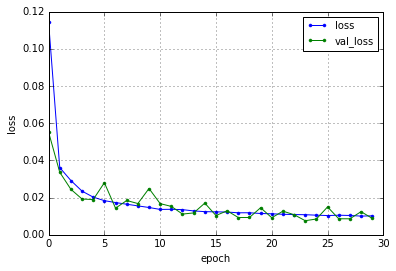

hiden node = 16
-edim=16-Window=512-Overlap=16-Adamax
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0655 - val_loss: 0.0317
Epoch 2/50
0s - loss: 0.0241 - val_loss: 0.0182
Epoch 3/50
0s - loss: 0.0152 - val_loss: 0.0138
Epoch 4/50
0s - loss: 0.0110 - val_loss: 0.0090
Epoch 5/50
0s - loss: 0.0077 - val_loss: 0.0061
Epoch 6/50
0s - loss: 0.0058 - val_loss: 0.0049
Epoch 7/50
0s - loss: 0.0047 - val_loss: 0.0038
Epoch 8/50
0s - loss: 0.0039 - val_loss: 0.0041
Epoch 9/50
0s - loss: 0.0036 - val_loss: 0.0030
Epoch 10/50
0s - loss: 0.0033 - val_loss: 0.0028
Epoch 11/50
0s - loss: 0.0029 - val_loss: 0.0046
Epoch 12/50
0s - loss: 0.0029 - val_loss: 0.0023
Epoch 13/50
0s - loss: 0.0028 - val_loss: 0.0029
Epoch 14/50
0s - loss: 0.0025 - val_loss: 0.0022
Epoch 15/50
0s - loss: 0.0025 - val_loss: 0.0019
Epoch 16/50
0s - loss: 0.0022 - val_loss: 0.0020
Epoch 17/50
0s - loss: 0.0023 - val_loss: 0.0019
Epoch 18/50
0s - loss: 0.0022 - val_loss: 0.0018
Epoch 19/50
0s - loss: 

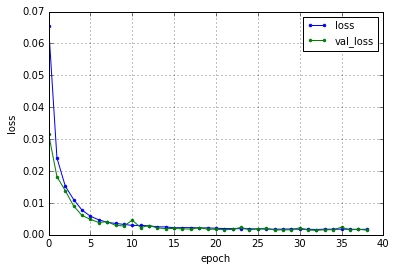

hiden node = 16
-edim=16-Window=512-Overlap=16-Adam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0781 - val_loss: 0.0267
Epoch 2/50
0s - loss: 0.0190 - val_loss: 0.0132
Epoch 3/50
0s - loss: 0.0115 - val_loss: 0.0096
Epoch 4/50
0s - loss: 0.0085 - val_loss: 0.0070
Epoch 5/50
0s - loss: 0.0068 - val_loss: 0.0063
Epoch 6/50
0s - loss: 0.0056 - val_loss: 0.0101
Epoch 7/50
0s - loss: 0.0051 - val_loss: 0.0146
Epoch 8/50
0s - loss: 0.0042 - val_loss: 0.0035
Epoch 9/50
0s - loss: 0.0039 - val_loss: 0.0065
Epoch 10/50
0s - loss: 0.0036 - val_loss: 0.0035
Epoch 11/50
0s - loss: 0.0037 - val_loss: 0.0045
Epoch 12/50
0s - loss: 0.0030 - val_loss: 0.0026
Epoch 13/50
0s - loss: 0.0031 - val_loss: 0.0023
Epoch 14/50
0s - loss: 0.0028 - val_loss: 0.0021
Epoch 15/50
0s - loss: 0.0026 - val_loss: 0.0020
Epoch 16/50
0s - loss: 0.0028 - val_loss: 0.0043
Epoch 17/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 18/50
0s - loss: 0.0024 - val_loss: 0.0019
Epoch 19/50
0s - loss: 0.

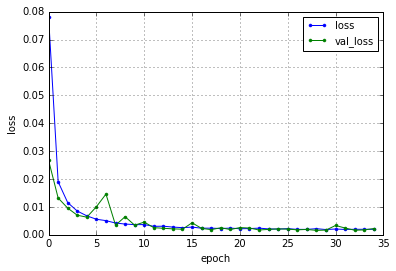

hiden node = 16
-edim=16-Window=512-Overlap=16-Adagrad
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0548 - val_loss: 0.0363
Epoch 2/50
0s - loss: 0.0279 - val_loss: 0.0226
Epoch 3/50
0s - loss: 0.0206 - val_loss: 0.0194
Epoch 4/50
0s - loss: 0.0169 - val_loss: 0.0138
Epoch 5/50
0s - loss: 0.0143 - val_loss: 0.0187
Epoch 6/50
0s - loss: 0.0129 - val_loss: 0.0193
Epoch 7/50
0s - loss: 0.0119 - val_loss: 0.0101
Epoch 8/50
0s - loss: 0.0109 - val_loss: 0.0098
Epoch 9/50
0s - loss: 0.0101 - val_loss: 0.0100
Epoch 10/50
0s - loss: 0.0093 - val_loss: 0.0102
Epoch 11/50
0s - loss: 0.0091 - val_loss: 0.0123
Epoch 12/50
0s - loss: 0.0083 - val_loss: 0.0074
Epoch 13/50
0s - loss: 0.0079 - val_loss: 0.0072
Epoch 14/50
0s - loss: 0.0076 - val_loss: 0.0075
Epoch 15/50
0s - loss: 0.0073 - val_loss: 0.0135
Epoch 16/50
0s - loss: 0.0070 - val_loss: 0.0103
Epoch 17/50
0s - loss: 0.0068 - val_loss: 0.0060
Epoch 18/50
0s - loss: 0.0065 - val_loss: 0.0060
Epoch 19/50
0s - loss:

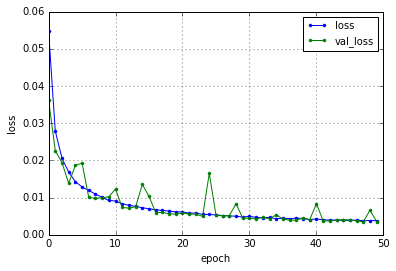

hiden node = 16
-edim=16-Window=512-Overlap=16-RMSprop
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0677 - val_loss: 0.0212
Epoch 2/50
0s - loss: 0.0258 - val_loss: 0.0275
Epoch 3/50
0s - loss: 0.0229 - val_loss: 0.0292
Epoch 4/50
0s - loss: 0.0218 - val_loss: 0.0221
Epoch 5/50
0s - loss: 0.0204 - val_loss: 0.0368
Epoch 6/50
0s - loss: 0.0194 - val_loss: 0.0212
Epoch 7/50
0s - loss: 0.0184 - val_loss: 0.0242
Epoch 8/50
0s - loss: 0.0178 - val_loss: 0.0210
Epoch 9/50
0s - loss: 0.0171 - val_loss: 0.0117
Epoch 10/50
0s - loss: 0.0165 - val_loss: 0.0187
Epoch 11/50
0s - loss: 0.0162 - val_loss: 0.0169
Epoch 12/50
0s - loss: 0.0158 - val_loss: 0.0130
Epoch 13/50
0s - loss: 0.0154 - val_loss: 0.0111
Epoch 14/50
0s - loss: 0.0151 - val_loss: 0.0149
Epoch 15/50
0s - loss: 0.0148 - val_loss: 0.0323
Epoch 16/50
0s - loss: 0.0144 - val_loss: 0.0200
Epoch 17/50
0s - loss: 0.0142 - val_loss: 0.0248
Epoch 18/50
0s - loss: 0.0140 - val_loss: 0.0093
Epoch 19/50
0s - loss:

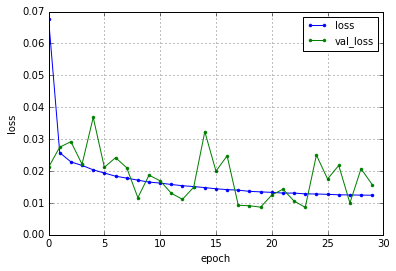

hiden node = 16
-edim=16-Window=512-Overlap=16-Nadam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0669 - val_loss: 0.0278
Epoch 2/50
0s - loss: 0.0276 - val_loss: 0.0175
Epoch 3/50
0s - loss: 0.0232 - val_loss: 0.0441
Epoch 4/50
0s - loss: 0.0195 - val_loss: 0.0125
Epoch 5/50
0s - loss: 0.0174 - val_loss: 0.0361
Epoch 6/50
0s - loss: 0.0151 - val_loss: 0.0108
Epoch 7/50
0s - loss: 0.0132 - val_loss: 0.0147
Epoch 8/50
0s - loss: 0.0124 - val_loss: 0.0074
Epoch 9/50
0s - loss: 0.0112 - val_loss: 0.0169
Epoch 10/50
0s - loss: 0.0108 - val_loss: 0.0067
Epoch 11/50
0s - loss: 0.0100 - val_loss: 0.0095
Epoch 12/50
0s - loss: 0.0096 - val_loss: 0.0076
Epoch 13/50
0s - loss: 0.0091 - val_loss: 0.0095
Epoch 14/50
0s - loss: 0.0085 - val_loss: 0.0055
Epoch 15/50
0s - loss: 0.0080 - val_loss: 0.0171
Epoch 16/50
0s - loss: 0.0076 - val_loss: 0.0063
Epoch 17/50
0s - loss: 0.0070 - val_loss: 0.0215
Epoch 18/50
0s - loss: 0.0066 - val_loss: 0.0043
Epoch 19/50
0s - loss: 0

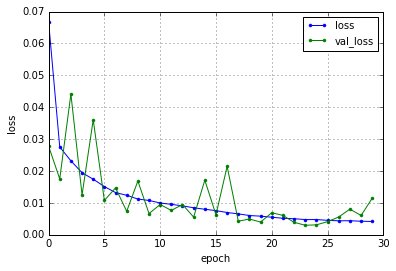

AccX is registed now
Build Complete
(254742,)
windowData's num =15858
SourceData's aborting data = 6
window shape is (15858, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=16-SGD
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
0s - loss: 0.7057 - val_loss: 0.6369
Epoch 2/50
0s - loss: 0.5665 - val_loss: 0.5009
Epoch 3/50
0s - loss: 0.4466 - val_loss: 0.3969
Epoch 4/50
0s - loss: 0.3563 - val_loss: 0.3193
Epoch 5/50
0s - loss: 0.2890 - val_loss: 0.2613
Epoch 6/50
0s - loss: 0.2386 - val_loss: 0.2177
Epoch 7/50
0s - loss: 0.2003 - val_loss: 0.1843
Epoch 8/50
0s - loss: 0.1709 - val_loss: 0.1585
Epoch 9/50
0s - loss: 0.1480 - val_loss: 0.1383
Epoch 10/50
0s - loss: 0.1301 - val_loss: 0.1225
Epoch 11/50
0s - loss: 0.1160 - val_loss: 0.1100
Epoch 12/50
0s - loss: 0.1048 - val_loss: 0.1000
Epoch 13/50
0s - loss: 0.0959 - val_loss: 0.0920
Epoch 14/50
0s - loss: 0.0886 - val_loss: 0.0855
Epoch 15/50
0s - loss: 0.0827 - val_loss: 0.0801
Epoch 16/50
0s - loss: 0.0778 - val_lo

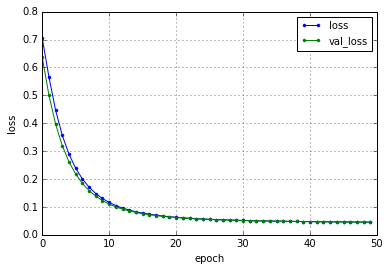

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adadelta
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
0s - loss: 0.1253 - val_loss: 0.0464
Epoch 2/50
0s - loss: 0.0450 - val_loss: 0.0402
Epoch 3/50
0s - loss: 0.0415 - val_loss: 0.0391
Epoch 4/50
0s - loss: 0.0389 - val_loss: 0.0342
Epoch 5/50
0s - loss: 0.0365 - val_loss: 0.0341
Epoch 6/50
0s - loss: 0.0335 - val_loss: 0.0289
Epoch 7/50
0s - loss: 0.0304 - val_loss: 0.0290
Epoch 8/50
0s - loss: 0.0279 - val_loss: 0.0287
Epoch 9/50
0s - loss: 0.0266 - val_loss: 0.0321
Epoch 10/50
0s - loss: 0.0252 - val_loss: 0.0203
Epoch 11/50
0s - loss: 0.0245 - val_loss: 0.0209
Epoch 12/50
0s - loss: 0.0242 - val_loss: 0.0359
Epoch 13/50
0s - loss: 0.0233 - val_loss: 0.0334
Epoch 14/50
0s - loss: 0.0225 - val_loss: 0.0278
Epoch 15/50
0s - loss: 0.0216 - val_loss: 0.0174
Epoch 16/50
0s - loss: 0.0213 - val_loss: 0.0246
Epoch 17/50
0s - loss: 0.0215 - val_loss: 0.0204
Epoch 18/50
0s - loss: 0.0202 - val_loss: 0.0198
Epoch 19/50
0s - los

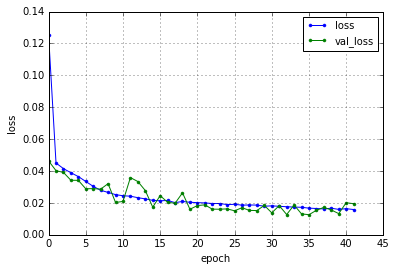

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adamax
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
0s - loss: 0.0720 - val_loss: 0.0399
Epoch 2/50
0s - loss: 0.0339 - val_loss: 0.0287
Epoch 3/50
0s - loss: 0.0233 - val_loss: 0.0180
Epoch 4/50
0s - loss: 0.0161 - val_loss: 0.0155
Epoch 5/50
0s - loss: 0.0122 - val_loss: 0.0097
Epoch 6/50
0s - loss: 0.0099 - val_loss: 0.0084
Epoch 7/50
0s - loss: 0.0085 - val_loss: 0.0068
Epoch 8/50
0s - loss: 0.0070 - val_loss: 0.0069
Epoch 9/50
0s - loss: 0.0065 - val_loss: 0.0057
Epoch 10/50
0s - loss: 0.0060 - val_loss: 0.0049
Epoch 11/50
0s - loss: 0.0055 - val_loss: 0.0047
Epoch 12/50
0s - loss: 0.0054 - val_loss: 0.0068
Epoch 13/50
0s - loss: 0.0052 - val_loss: 0.0048
Epoch 14/50
0s - loss: 0.0052 - val_loss: 0.0065
Epoch 15/50
0s - loss: 0.0051 - val_loss: 0.0047
Epoch 16/50
0s - loss: 0.0045 - val_loss: 0.0042
Epoch 17/50
0s - loss: 0.0051 - val_loss: 0.0039
Epoch 18/50
0s - loss: 0.0044 - val_loss: 0.0038
Epoch 19/50
0s - loss:

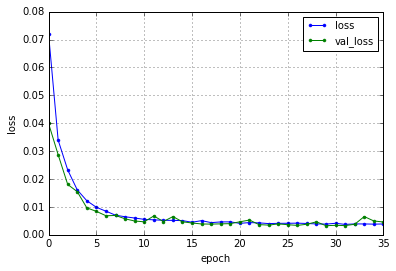

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
0s - loss: 0.0835 - val_loss: 0.0364
Epoch 2/50
0s - loss: 0.0302 - val_loss: 0.0230
Epoch 3/50
0s - loss: 0.0193 - val_loss: 0.0161
Epoch 4/50
0s - loss: 0.0141 - val_loss: 0.0128
Epoch 5/50
0s - loss: 0.0119 - val_loss: 0.0099
Epoch 6/50
0s - loss: 0.0098 - val_loss: 0.0088
Epoch 7/50
0s - loss: 0.0089 - val_loss: 0.0073
Epoch 8/50
0s - loss: 0.0076 - val_loss: 0.0076
Epoch 9/50
0s - loss: 0.0072 - val_loss: 0.0057
Epoch 10/50
0s - loss: 0.0067 - val_loss: 0.0057
Epoch 11/50
0s - loss: 0.0063 - val_loss: 0.0059
Epoch 12/50
0s - loss: 0.0061 - val_loss: 0.0081
Epoch 13/50
0s - loss: 0.0057 - val_loss: 0.0068
Epoch 14/50
0s - loss: 0.0055 - val_loss: 0.0116
Epoch 15/50
0s - loss: 0.0054 - val_loss: 0.0042
Epoch 16/50
0s - loss: 0.0052 - val_loss: 0.0040
Epoch 17/50
0s - loss: 0.0050 - val_loss: 0.0041
Epoch 18/50
0s - loss: 0.0049 - val_loss: 0.0039
Epoch 19/50
0s - loss: 0

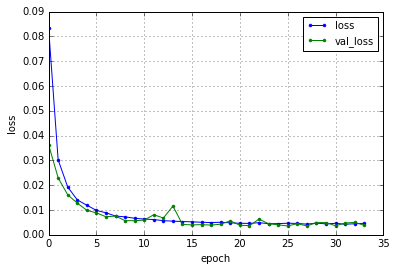

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adagrad
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
0s - loss: 0.0719 - val_loss: 0.0400
Epoch 2/50
0s - loss: 0.0396 - val_loss: 0.0381
Epoch 3/50
0s - loss: 0.0338 - val_loss: 0.0300
Epoch 4/50
0s - loss: 0.0280 - val_loss: 0.0232
Epoch 5/50
0s - loss: 0.0246 - val_loss: 0.0208
Epoch 6/50
0s - loss: 0.0227 - val_loss: 0.0192
Epoch 7/50
0s - loss: 0.0210 - val_loss: 0.0193
Epoch 8/50
0s - loss: 0.0194 - val_loss: 0.0197
Epoch 9/50
0s - loss: 0.0183 - val_loss: 0.0158
Epoch 10/50
0s - loss: 0.0171 - val_loss: 0.0155
Epoch 11/50
0s - loss: 0.0165 - val_loss: 0.0157
Epoch 12/50
0s - loss: 0.0157 - val_loss: 0.0136
Epoch 13/50
0s - loss: 0.0147 - val_loss: 0.0129
Epoch 14/50
0s - loss: 0.0141 - val_loss: 0.0124
Epoch 15/50
0s - loss: 0.0137 - val_loss: 0.0119
Epoch 16/50
0s - loss: 0.0130 - val_loss: 0.0119
Epoch 17/50
0s - loss: 0.0129 - val_loss: 0.0158
Epoch 18/50
0s - loss: 0.0124 - val_loss: 0.0145
Epoch 19/50
0s - loss

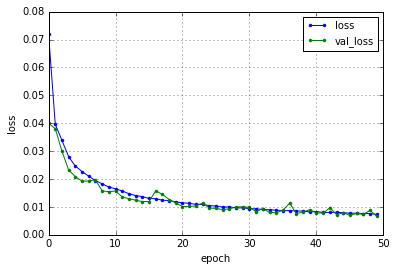

hiden node = 16
-edim=16-Window=1024-Overlap=16-RMSprop
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
0s - loss: 0.0817 - val_loss: 0.0448
Epoch 2/50
0s - loss: 0.0448 - val_loss: 0.0288
Epoch 3/50
0s - loss: 0.0374 - val_loss: 0.0320
Epoch 4/50
0s - loss: 0.0346 - val_loss: 0.0545
Epoch 5/50
0s - loss: 0.0327 - val_loss: 0.0254
Epoch 6/50
0s - loss: 0.0305 - val_loss: 0.0253
Epoch 7/50
0s - loss: 0.0294 - val_loss: 0.0189
Epoch 8/50
0s - loss: 0.0284 - val_loss: 0.0176
Epoch 9/50
0s - loss: 0.0272 - val_loss: 0.0246
Epoch 10/50
0s - loss: 0.0265 - val_loss: 0.0402
Epoch 11/50
0s - loss: 0.0254 - val_loss: 0.0403
Epoch 12/50
0s - loss: 0.0250 - val_loss: 0.0207
Epoch 13/50
0s - loss: 0.0246 - val_loss: 0.0187
Epoch 14/50
0s - loss: 0.0238 - val_loss: 0.0254


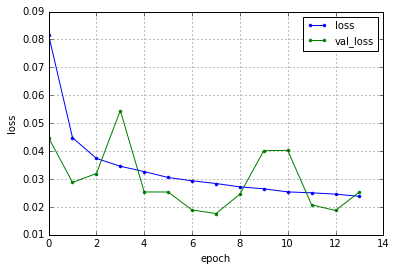

hiden node = 16
-edim=16-Window=1024-Overlap=16-Nadam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
0s - loss: 0.1002 - val_loss: 0.0606
Epoch 2/50
0s - loss: 0.0656 - val_loss: 0.0601
Epoch 3/50
0s - loss: 0.0504 - val_loss: 0.0469
Epoch 4/50
0s - loss: 0.0507 - val_loss: 0.0696
Epoch 5/50
0s - loss: 0.0516 - val_loss: 0.0434
Epoch 6/50
0s - loss: 0.0534 - val_loss: 0.0383
Epoch 7/50
0s - loss: 0.0476 - val_loss: 0.0385
Epoch 8/50
0s - loss: 0.0488 - val_loss: 0.0439
Epoch 9/50
0s - loss: 0.0386 - val_loss: 0.0512
Epoch 10/50
0s - loss: 0.0323 - val_loss: 0.0251
Epoch 11/50
0s - loss: 0.0263 - val_loss: 0.0230
Epoch 12/50
0s - loss: 0.0250 - val_loss: 0.0201
Epoch 13/50
0s - loss: 0.0205 - val_loss: 0.0189
Epoch 14/50
0s - loss: 0.0199 - val_loss: 0.0177
Epoch 15/50
0s - loss: 0.0184 - val_loss: 0.0215
Epoch 16/50
0s - loss: 0.0174 - val_loss: 0.0131
Epoch 17/50
0s - loss: 0.0171 - val_loss: 0.0145
Epoch 18/50
0s - loss: 0.0163 - val_loss: 0.0145
Epoch 19/50
0s - loss: 

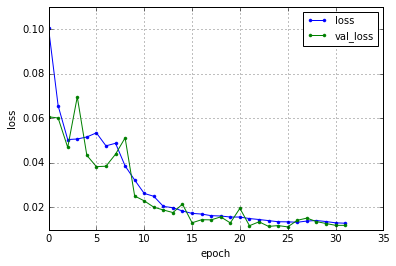

AccX is registed now
Build Complete
(254742,)
windowData's num =15794
SourceData's aborting data = 6
window shape is (15794, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=16-SGD
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.7281 - val_loss: 0.6921
Epoch 2/50
1s - loss: 0.6522 - val_loss: 0.6132
Epoch 3/50
1s - loss: 0.5775 - val_loss: 0.5434
Epoch 4/50
1s - loss: 0.5125 - val_loss: 0.4829
Epoch 5/50
1s - loss: 0.4563 - val_loss: 0.4309
Epoch 6/50
1s - loss: 0.4080 - val_loss: 0.3861
Epoch 7/50
1s - loss: 0.3664 - val_loss: 0.3475
Epoch 8/50
1s - loss: 0.3305 - val_loss: 0.3141
Epoch 9/50
1s - loss: 0.2994 - val_loss: 0.2853
Epoch 10/50
1s - loss: 0.2724 - val_loss: 0.2601
Epoch 11/50
1s - loss: 0.2488 - val_loss: 0.2380
Epoch 12/50
1s - loss: 0.2282 - val_loss: 0.2187
Epoch 13/50
1s - loss: 0.2101 - val_loss: 0.2017
Epoch 14/50
1s - loss: 0.1942 - val_loss: 0.1868
Epoch 15/50
1s - loss: 0.1802 - val_loss: 0.1737
Epoch 16/50
1s - loss: 0.1679 - val_lo

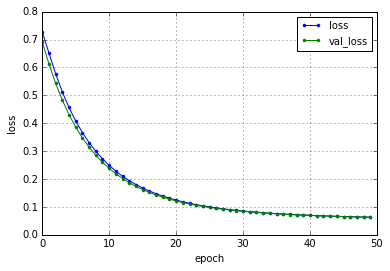

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adadelta
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.1494 - val_loss: 0.0599
Epoch 2/50
1s - loss: 0.0555 - val_loss: 0.0750
Epoch 3/50
1s - loss: 0.0523 - val_loss: 0.0467
Epoch 4/50
1s - loss: 0.0493 - val_loss: 0.0493
Epoch 5/50
1s - loss: 0.0480 - val_loss: 0.0430
Epoch 6/50
1s - loss: 0.0470 - val_loss: 0.0632
Epoch 7/50
1s - loss: 0.0454 - val_loss: 0.0424
Epoch 8/50
1s - loss: 0.0448 - val_loss: 0.0454
Epoch 9/50
1s - loss: 0.0432 - val_loss: 0.0388
Epoch 10/50
1s - loss: 0.0429 - val_loss: 0.0424
Epoch 11/50
1s - loss: 0.0421 - val_loss: 0.0382
Epoch 12/50
1s - loss: 0.0411 - val_loss: 0.0448
Epoch 13/50
1s - loss: 0.0397 - val_loss: 0.0361
Epoch 14/50
1s - loss: 0.0385 - val_loss: 0.0337
Epoch 15/50
1s - loss: 0.0371 - val_loss: 0.0325
Epoch 16/50
1s - loss: 0.0363 - val_loss: 0.0419
Epoch 17/50
1s - loss: 0.0351 - val_loss: 0.0309
Epoch 18/50
1s - loss: 0.0343 - val_loss: 0.0310
Epoch 19/50
1s - los

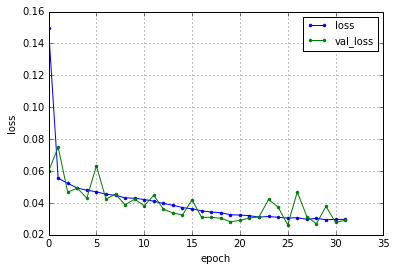

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adamax
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.0808 - val_loss: 0.0450
Epoch 2/50
1s - loss: 0.0410 - val_loss: 0.0351
Epoch 3/50
1s - loss: 0.0304 - val_loss: 0.0260
Epoch 4/50
1s - loss: 0.0234 - val_loss: 0.0204
Epoch 5/50
1s - loss: 0.0193 - val_loss: 0.0164
Epoch 6/50
1s - loss: 0.0166 - val_loss: 0.0150
Epoch 7/50
1s - loss: 0.0146 - val_loss: 0.0125
Epoch 8/50
1s - loss: 0.0129 - val_loss: 0.0191
Epoch 9/50
1s - loss: 0.0126 - val_loss: 0.0116
Epoch 10/50
1s - loss: 0.0120 - val_loss: 0.0119
Epoch 11/50
1s - loss: 0.0115 - val_loss: 0.0100
Epoch 12/50
1s - loss: 0.0105 - val_loss: 0.0102
Epoch 13/50
1s - loss: 0.0109 - val_loss: 0.0124
Epoch 14/50
1s - loss: 0.0105 - val_loss: 0.0121
Epoch 15/50
1s - loss: 0.0100 - val_loss: 0.0088
Epoch 16/50
1s - loss: 0.0100 - val_loss: 0.0101
Epoch 17/50
1s - loss: 0.0101 - val_loss: 0.0086
Epoch 18/50
1s - loss: 0.0096 - val_loss: 0.0088
Epoch 19/50
1s - loss:

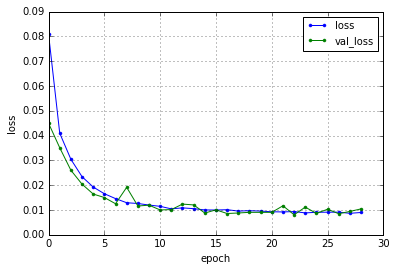

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.0962 - val_loss: 0.0523
Epoch 2/50
1s - loss: 0.0433 - val_loss: 0.0300
Epoch 3/50
1s - loss: 0.0335 - val_loss: 0.0296
Epoch 4/50
1s - loss: 0.0278 - val_loss: 0.0214
Epoch 5/50
1s - loss: 0.0247 - val_loss: 0.0235
Epoch 6/50
1s - loss: 0.0217 - val_loss: 0.0177
Epoch 7/50
1s - loss: 0.0185 - val_loss: 0.0163
Epoch 8/50
1s - loss: 0.0165 - val_loss: 0.0142
Epoch 9/50
1s - loss: 0.0159 - val_loss: 0.0145
Epoch 10/50
1s - loss: 0.0148 - val_loss: 0.0154
Epoch 11/50
1s - loss: 0.0141 - val_loss: 0.0306
Epoch 12/50
1s - loss: 0.0148 - val_loss: 0.0126
Epoch 13/50
1s - loss: 0.0138 - val_loss: 0.0113
Epoch 14/50
1s - loss: 0.0123 - val_loss: 0.0121
Epoch 15/50
1s - loss: 0.0133 - val_loss: 0.0213
Epoch 16/50
1s - loss: 0.0125 - val_loss: 0.0143
Epoch 17/50
1s - loss: 0.0140 - val_loss: 0.0148
Epoch 18/50
1s - loss: 0.0128 - val_loss: 0.0117
Epoch 19/50
1s - loss: 0

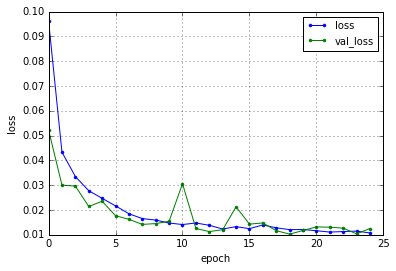

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adagrad
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.1008 - val_loss: 0.0647
Epoch 2/50
1s - loss: 0.0590 - val_loss: 0.0515
Epoch 3/50
1s - loss: 0.0486 - val_loss: 0.0469
Epoch 4/50
1s - loss: 0.0423 - val_loss: 0.0406
Epoch 5/50
1s - loss: 0.0379 - val_loss: 0.0403
Epoch 6/50
1s - loss: 0.0347 - val_loss: 0.0301
Epoch 7/50
1s - loss: 0.0312 - val_loss: 0.0302
Epoch 8/50
1s - loss: 0.0293 - val_loss: 0.0264
Epoch 9/50
1s - loss: 0.0281 - val_loss: 0.0246
Epoch 10/50
1s - loss: 0.0265 - val_loss: 0.0336
Epoch 11/50
1s - loss: 0.0252 - val_loss: 0.0226
Epoch 12/50
1s - loss: 0.0245 - val_loss: 0.0218
Epoch 13/50
1s - loss: 0.0235 - val_loss: 0.0243
Epoch 14/50
1s - loss: 0.0229 - val_loss: 0.0214
Epoch 15/50
1s - loss: 0.0224 - val_loss: 0.0225
Epoch 16/50
1s - loss: 0.0217 - val_loss: 0.0217
Epoch 17/50
1s - loss: 0.0212 - val_loss: 0.0311
Epoch 18/50
1s - loss: 0.0205 - val_loss: 0.0182
Epoch 19/50
1s - loss

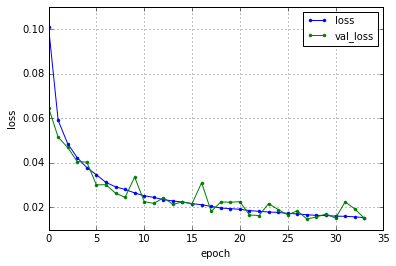

hiden node = 16
-edim=16-Window=2048-Overlap=16-RMSprop
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.1064 - val_loss: 0.0649
Epoch 2/50
1s - loss: 0.0653 - val_loss: 0.0553
Epoch 3/50
1s - loss: 0.0562 - val_loss: 0.0504
Epoch 4/50
1s - loss: 0.0503 - val_loss: 0.0598
Epoch 5/50
1s - loss: 0.0465 - val_loss: 0.0394
Epoch 6/50
1s - loss: 0.0442 - val_loss: 0.0382
Epoch 7/50
1s - loss: 0.0422 - val_loss: 0.0414
Epoch 8/50
1s - loss: 0.0400 - val_loss: 0.0311
Epoch 9/50
1s - loss: 0.0396 - val_loss: 0.0319
Epoch 10/50
1s - loss: 0.0379 - val_loss: 0.0385
Epoch 11/50
1s - loss: 0.0374 - val_loss: 0.0297
Epoch 12/50
1s - loss: 0.0371 - val_loss: 0.0501
Epoch 13/50
1s - loss: 0.0363 - val_loss: 0.0312
Epoch 14/50
1s - loss: 0.0357 - val_loss: 0.0325
Epoch 15/50
1s - loss: 0.0355 - val_loss: 0.0334
Epoch 16/50
1s - loss: 0.0349 - val_loss: 0.0283
Epoch 17/50
1s - loss: 0.0344 - val_loss: 0.0322
Epoch 18/50
1s - loss: 0.0341 - val_loss: 0.0283
Epoch 19/50
1s - loss

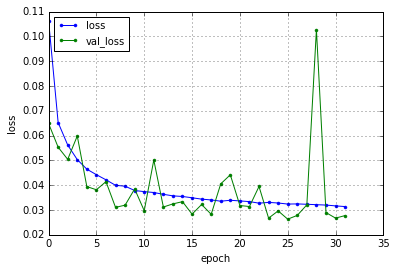

hiden node = 16
-edim=16-Window=2048-Overlap=16-Nadam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
1s - loss: 0.1207 - val_loss: 0.0874
Epoch 2/50
1s - loss: 0.0793 - val_loss: 0.0798
Epoch 3/50
1s - loss: 0.0689 - val_loss: 0.0700
Epoch 4/50
1s - loss: 0.0661 - val_loss: 0.0723
Epoch 5/50
1s - loss: 0.0597 - val_loss: 0.0547
Epoch 6/50
1s - loss: 0.0639 - val_loss: 0.0542
Epoch 7/50
1s - loss: 0.0527 - val_loss: 0.0674
Epoch 8/50
1s - loss: 0.0530 - val_loss: 0.0782
Epoch 9/50
1s - loss: 0.0569 - val_loss: 0.0434
Epoch 10/50
1s - loss: 0.0556 - val_loss: 0.0830
Epoch 11/50
1s - loss: 0.0597 - val_loss: 0.0531
Epoch 12/50
1s - loss: 0.0511 - val_loss: 0.0423
Epoch 13/50
1s - loss: 0.0581 - val_loss: 0.0497
Epoch 14/50
1s - loss: 0.0567 - val_loss: 0.0558
Epoch 15/50
1s - loss: 0.0541 - val_loss: 0.0482
Epoch 16/50
1s - loss: 0.0539 - val_loss: 0.0712
Epoch 17/50
1s - loss: 0.0539 - val_loss: 0.0460
Epoch 18/50
1s - loss: 0.0478 - val_loss: 0.0636


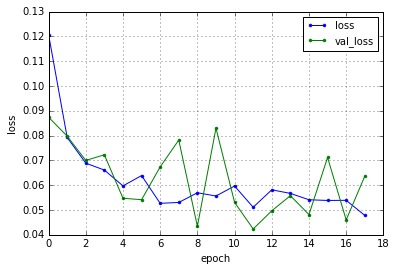

AccX is registed now
Build Complete
(254742,)
windowData's num =15666
SourceData's aborting data = 6
window shape is (15666, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=16-SGD
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
4s - loss: 0.7384 - val_loss: 0.7198
Epoch 2/50
4s - loss: 0.6990 - val_loss: 0.6781
Epoch 3/50
4s - loss: 0.6579 - val_loss: 0.6381
Epoch 4/50
4s - loss: 0.6194 - val_loss: 0.6009
Epoch 5/50
4s - loss: 0.5835 - val_loss: 0.5663
Epoch 6/50
4s - loss: 0.5501 - val_loss: 0.5343
Epoch 7/50
4s - loss: 0.5193 - val_loss: 0.5045
Epoch 8/50
4s - loss: 0.4906 - val_loss: 0.4770
Epoch 9/50
4s - loss: 0.4641 - val_loss: 0.4515
Epoch 10/50
4s - loss: 0.4395 - val_loss: 0.4278
Epoch 11/50
4s - loss: 0.4167 - val_loss: 0.4059
Epoch 12/50
4s - loss: 0.3956 - val_loss: 0.3855
Epoch 13/50
4s - loss: 0.3760 - val_loss: 0.3666
Epoch 14/50
4s - loss: 0.3577 - val_loss: 0.3490
Epoch 15/50
4s - loss: 0.3407 - val_loss: 0.3326
Epoch 16/50
4s - loss: 0.3249 - val_lo

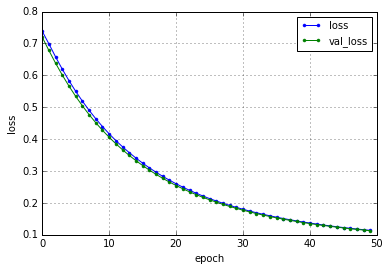

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adadelta
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
4s - loss: 0.2018 - val_loss: 0.0834
Epoch 2/50
4s - loss: 0.0734 - val_loss: 0.0714
Epoch 3/50
4s - loss: 0.0675 - val_loss: 0.0617
Epoch 4/50
4s - loss: 0.0628 - val_loss: 0.0828
Epoch 5/50
4s - loss: 0.0607 - val_loss: 0.0667
Epoch 6/50
4s - loss: 0.0581 - val_loss: 0.1240
Epoch 7/50
4s - loss: 0.0563 - val_loss: 0.0537
Epoch 8/50
4s - loss: 0.0549 - val_loss: 0.0520
Epoch 9/50
4s - loss: 0.0540 - val_loss: 0.0497
Epoch 10/50
4s - loss: 0.0524 - val_loss: 0.0502
Epoch 11/50
4s - loss: 0.0519 - val_loss: 0.0482
Epoch 12/50
4s - loss: 0.0509 - val_loss: 0.0542
Epoch 13/50
4s - loss: 0.0502 - val_loss: 0.0512
Epoch 14/50
4s - loss: 0.0497 - val_loss: 0.0464
Epoch 15/50
4s - loss: 0.0492 - val_loss: 0.0483
Epoch 16/50
4s - loss: 0.0484 - val_loss: 0.0459
Epoch 17/50
4s - loss: 0.0477 - val_loss: 0.0445
Epoch 18/50
4s - loss: 0.0478 - val_loss: 0.0451
Epoch 19/50
4s - los

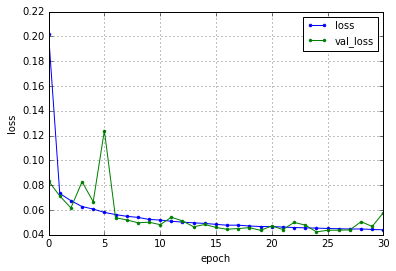

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adamax
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
4s - loss: 0.0951 - val_loss: 0.0551
Epoch 2/50
4s - loss: 0.0483 - val_loss: 0.0430
Epoch 3/50
4s - loss: 0.0396 - val_loss: 0.0349
Epoch 4/50
4s - loss: 0.0324 - val_loss: 0.0287
Epoch 5/50
4s - loss: 0.0286 - val_loss: 0.0255
Epoch 6/50
4s - loss: 0.0258 - val_loss: 0.0243
Epoch 7/50
4s - loss: 0.0239 - val_loss: 0.0220
Epoch 8/50
4s - loss: 0.0231 - val_loss: 0.0209
Epoch 9/50
4s - loss: 0.0230 - val_loss: 0.0228
Epoch 10/50
4s - loss: 0.0203 - val_loss: 0.0314
Epoch 11/50
4s - loss: 0.0209 - val_loss: 0.0204
Epoch 12/50
4s - loss: 0.0214 - val_loss: 0.0194
Epoch 13/50
4s - loss: 0.0208 - val_loss: 0.0211
Epoch 14/50
4s - loss: 0.0204 - val_loss: 0.0189
Epoch 15/50
4s - loss: 0.0201 - val_loss: 0.0181
Epoch 16/50
4s - loss: 0.0197 - val_loss: 0.0230
Epoch 17/50
4s - loss: 0.0203 - val_loss: 0.0269
Epoch 18/50
4s - loss: 0.0197 - val_loss: 0.0193
Epoch 19/50
4s - loss:

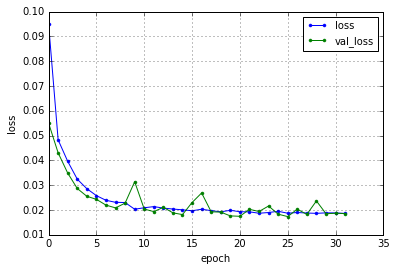

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
4s - loss: 0.1185 - val_loss: 0.0691
Epoch 2/50
4s - loss: 0.0673 - val_loss: 0.0638
Epoch 3/50
4s - loss: 0.0604 - val_loss: 0.0581
Epoch 4/50
4s - loss: 0.0573 - val_loss: 0.0588
Epoch 5/50
4s - loss: 0.0551 - val_loss: 0.0558
Epoch 6/50
4s - loss: 0.0525 - val_loss: 0.0498
Epoch 7/50
4s - loss: 0.0506 - val_loss: 0.0477
Epoch 8/50
4s - loss: 0.0511 - val_loss: 0.0559
Epoch 9/50
4s - loss: 0.0511 - val_loss: 0.0466
Epoch 10/50
4s - loss: 0.0462 - val_loss: 0.0462
Epoch 11/50
4s - loss: 0.0461 - val_loss: 0.0415
Epoch 12/50
4s - loss: 0.0426 - val_loss: 0.0403
Epoch 13/50
4s - loss: 0.0396 - val_loss: 0.0399
Epoch 14/50
4s - loss: 0.0415 - val_loss: 0.0354
Epoch 15/50
4s - loss: 0.0382 - val_loss: 0.0376
Epoch 16/50
4s - loss: 0.0360 - val_loss: 0.0339
Epoch 17/50
4s - loss: 0.0410 - val_loss: 0.0338
Epoch 18/50
4s - loss: 0.0349 - val_loss: 0.0329
Epoch 19/50
4s - loss: 0

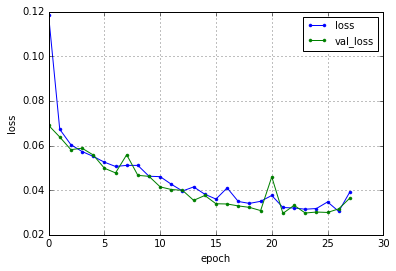

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adagrad
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
4s - loss: 0.1096 - val_loss: 0.0804
Epoch 2/50
4s - loss: 0.0767 - val_loss: 0.0705
Epoch 3/50
4s - loss: 0.0680 - val_loss: 0.0662
Epoch 4/50
4s - loss: 0.0636 - val_loss: 0.0638
Epoch 5/50
4s - loss: 0.0608 - val_loss: 0.0587
Epoch 6/50
4s - loss: 0.0587 - val_loss: 0.0578
Epoch 7/50
4s - loss: 0.0565 - val_loss: 0.0552
Epoch 8/50
4s - loss: 0.0535 - val_loss: 0.0512
Epoch 9/50
4s - loss: 0.0503 - val_loss: 0.0492
Epoch 10/50
4s - loss: 0.0487 - val_loss: 0.0486
Epoch 11/50
4s - loss: 0.0474 - val_loss: 0.0472
Epoch 12/50
4s - loss: 0.0466 - val_loss: 0.0455
Epoch 13/50
4s - loss: 0.0457 - val_loss: 0.0470
Epoch 14/50
4s - loss: 0.0447 - val_loss: 0.0443
Epoch 15/50
4s - loss: 0.0441 - val_loss: 0.0433
Epoch 16/50
4s - loss: 0.0433 - val_loss: 0.0430
Epoch 17/50
4s - loss: 0.0428 - val_loss: 0.0425
Epoch 18/50
4s - loss: 0.0422 - val_loss: 0.0422
Epoch 19/50
4s - loss

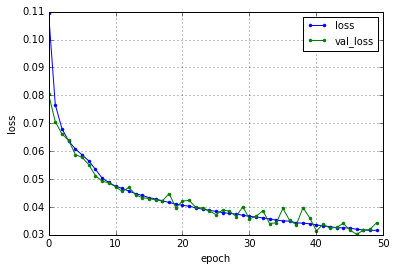

hiden node = 16
-edim=16-Window=4096-Overlap=16-RMSprop
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
4s - loss: 0.1336 - val_loss: 0.0780
Epoch 2/50
4s - loss: 0.0861 - val_loss: 0.0762
Epoch 3/50
4s - loss: 0.0703 - val_loss: 0.0663
Epoch 4/50
4s - loss: 0.0629 - val_loss: 0.0565
Epoch 5/50
4s - loss: 0.0587 - val_loss: 0.0626
Epoch 6/50
4s - loss: 0.0558 - val_loss: 0.0712
Epoch 7/50
4s - loss: 0.0542 - val_loss: 0.0513
Epoch 8/50
4s - loss: 0.0530 - val_loss: 0.0982
Epoch 9/50
4s - loss: 0.0518 - val_loss: 0.0560
Epoch 10/50
4s - loss: 0.0509 - val_loss: 0.0508
Epoch 11/50
4s - loss: 0.0501 - val_loss: 0.0582
Epoch 12/50
4s - loss: 0.0497 - val_loss: 0.0476
Epoch 13/50
4s - loss: 0.0488 - val_loss: 0.0459
Epoch 14/50
4s - loss: 0.0483 - val_loss: 0.0579
Epoch 15/50
4s - loss: 0.0480 - val_loss: 0.0580
Epoch 16/50
4s - loss: 0.0478 - val_loss: 0.0456
Epoch 17/50
4s - loss: 0.0476 - val_loss: 0.0477
Epoch 18/50
4s - loss: 0.0471 - val_loss: 0.0442
Epoch 19/50
4s - loss

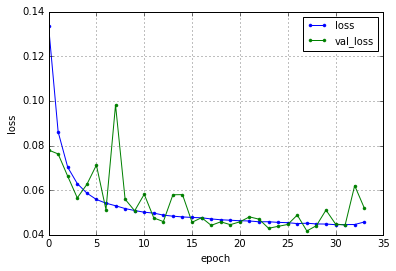

hiden node = 16
-edim=16-Window=4096-Overlap=16-Nadam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
4s - loss: 0.1302 - val_loss: 0.0929
Epoch 2/50
4s - loss: 0.0906 - val_loss: 0.0884
Epoch 3/50
5s - loss: 0.0871 - val_loss: 0.0810
Epoch 4/50
5s - loss: 0.0791 - val_loss: 0.0761
Epoch 5/50
5s - loss: 0.0718 - val_loss: 0.0715
Epoch 6/50
5s - loss: 0.0710 - val_loss: 0.0738
Epoch 7/50
4s - loss: 0.0684 - val_loss: 0.0685
Epoch 8/50
4s - loss: 0.0669 - val_loss: 0.0651
Epoch 9/50
4s - loss: 0.0656 - val_loss: 0.0631
Epoch 10/50
5s - loss: 0.0638 - val_loss: 0.0678
Epoch 11/50
5s - loss: 0.0633 - val_loss: 0.0595
Epoch 12/50
5s - loss: 0.0612 - val_loss: 0.0581
Epoch 13/50
4s - loss: 0.0591 - val_loss: 0.0665
Epoch 14/50
4s - loss: 0.0607 - val_loss: 0.0576
Epoch 15/50
4s - loss: 0.0566 - val_loss: 0.0547
Epoch 16/50
4s - loss: 0.0553 - val_loss: 0.0528
Epoch 17/50
4s - loss: 0.0550 - val_loss: 0.0552
Epoch 18/50
4s - loss: 0.0551 - val_loss: 0.0555
Epoch 19/50
4s - loss: 

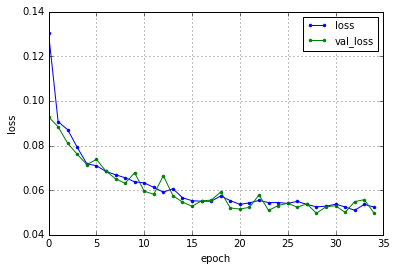

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    for opt,optName in zip(optimizers,optimArray):
        print "hiden node = "+str(encoding_dim)
        CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName
        print CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer=opt(), loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()

In [9]:
print "finish"

finish
